#  @ Vahan: Take-Home Task
#### Applicant:- Raushan Kumar Prakash

Major Steps followed ahead:-
1. Analysing the Leads dataset:- Doing basic preprocessing, finding proper insights
3. Analysing the Lead_Call dataset
4. Analysing the telecaller dataset
5. Merging all the three dataset based on the given foreign keys
6. Doing final analysis of the final dataset:- Drawing some hidden insights from it
7. Building a simple classification model on the dataset

#### Importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the first dataset: [leads]
leads = pd.read_csv("leads.csv", encoding='latin-1')

# 1. leads dataset:

In [3]:
# shape of the dataset:
leads.shape

(9916, 10)

### checking the missing values value % in all these datasets.

In [4]:
leads.isnull().mean()*100

id              0.000000
userId         38.755547
name            0.000000
phoneNumber     0.000000
city            7.442517
state          13.916902
source          0.020169
isExternal      0.000000
createdAt       0.000000
receivedAt      0.000000
dtype: float64

In [5]:
# duplicate values.
leads.duplicated().sum()

0

In [6]:
# Detailed information about the dataset:-
leads_info = leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9916 entries, 0 to 9915
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9916 non-null   object
 1   userId       6073 non-null   object
 2   name         9916 non-null   object
 3   phoneNumber  9916 non-null   int64 
 4   city         9178 non-null   object
 5   state        8536 non-null   object
 6   source       9914 non-null   object
 7   isExternal   9916 non-null   bool  
 8   createdAt    9916 non-null   object
 9   receivedAt   9916 non-null   object
dtypes: bool(1), int64(1), object(8)
memory usage: 707.0+ KB


In [7]:
# We found that the datetime features are of object type, they must be converted to datetime format
# Converting timestamps to datetime format
leads['createdAt'] = pd.to_datetime(leads['createdAt'], utc=True,format='ISO8601')
leads['receivedAt'] = pd.to_datetime(leads['receivedAt'], utc=True,format='ISO8601')

In [8]:
# Info about the cities and states of the leads.
unique_cities = leads['city'].unique()
unique_states = leads['state'].unique()
unique_cities, unique_states

(array([nan, 'Delhi/NCR', 'Hyderabad', 'Bangalore', 'Chennai',
        'Coimbatore', 'Delhi', 'Mumbai', 'Mysore', 'Patna', 'Yadhgirir',
        'Tirupati', 'Anantapur', 'Kolkata', 'Guwahati',
        'Bangalore, Delhi, Hyderabad, Mumbai', 'Warangal', 'Jaipur',
        'Pondicherry', 'Vishakhapatnam', 'Karimnagar', 'Kurnool',
        'Belagavi', 'Chandigarh', 'Madurai', 'Silvassa', 'Kakinada',
        'Karanataka', 'Mangalore', 'muzaffarpur', 'Cuttack', 'Ahmedabad',
        'Kerala', 'Vijayawada', 'Uttarakhand', 'Nellore', 'Trichy',
        'Manteswar', 'Vizianagaram', 'Siliguri', 'Gadwal', 'Gurgaon',
        'Bhimavaram', 'Aligarh', 'Tiruppur', 'Tamilnadu', 'your city',
        'Ludhiana', 'Ongole', 'Mahbubnagar', 'Kadapa', 'Bheedhar',
        'Tarn Taran', 'Jubilee Hills', 'Pune', 'Khammam', 'Lucknow',
        'Banglore', 'Chennai/Bangalore', 'Asansol', 'Nagaon',
        'Rajahmundry'], dtype=object),
 array([nan, 'Delhi-NCR', 'Telangana', 'Karnataka', 'Tamil Nadu', 'Delhi',
        '

# Handling the Missing values for Lead dataset

In [9]:
# Since more than 30% of userid are missing, we can't simply drop them, better to impute them.
# Filling the missing 'userId' with a new label "Unknown" due to high missing percentage
leads['userId'] = leads['userId'].fillna("Unknown")

In [10]:
# Since only 0.02 % of source are missing:- 
# So we can fill them with the most common source value
most_common_source = leads['source'].mode()[0]
most_common_source

'Referrals'

In [11]:
leads['source'] = leads['source'].fillna(most_common_source)

In [12]:
# It is found that for some cities states are missing
# so using a predefined mapping we'll replace them.
city_to_state = {
    "Hyderabad": "Telangana",
    "Bangalore": "Karnataka",
    "Delhi/NCR": "Delhi",
    "Ahmedabad": "Gujarat",
    "Chennai": "Tamil Nadu",
    "Mumbai": "Maharashtra",
    "Mysore": "Karnataka",
}
# Filling the missing states based on the city using the mapping
leads['state'] = leads.apply(
    lambda row: city_to_state.get(row['city'], "Missing") if pd.isnull(row['state']) else row['state'], axis=1
)
# Filling the missing 'city' with "Missing" if 'state' is present or if both are missing
leads['city'] = leads.apply(
    lambda row: "Missing" if pd.isnull(row['city']) else row['city'], axis=1
)

In [13]:
leads.isnull().mean()*100

id             0.0
userId         0.0
name           0.0
phoneNumber    0.0
city           0.0
state          0.0
source         0.0
isExternal     0.0
createdAt      0.0
receivedAt     0.0
dtype: float64

## All the missing values have been handled properly above

## Descriptive Statistics

In [14]:
# count of each of the different cities.
leads['city'].value_counts()

city
Hyderabad      3413
Bangalore      2273
Chennai        1282
Delhi/NCR       894
Missing         738
               ... 
Tiruppur          1
Vijayawada        1
Bhimavaram        1
Uttarakhand       1
Rajahmundry       1
Name: count, Length: 62, dtype: int64

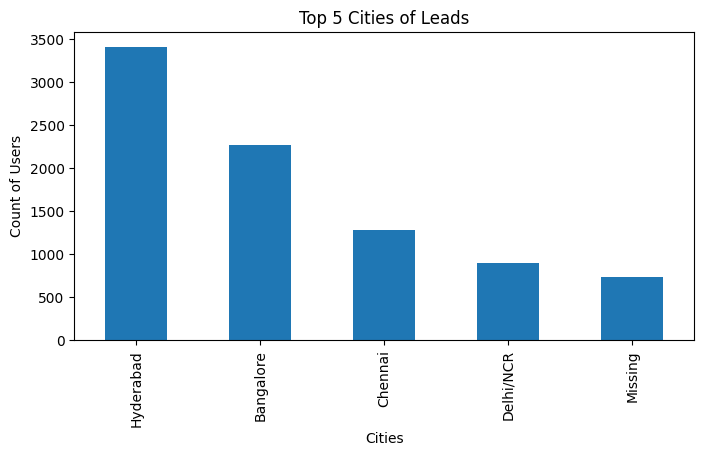

In [15]:
# Plotting the top N cities from where the leads belong:
plt.figure(figsize=(8, 4))
top_5_city = leads['city'].value_counts().head(5)
top_5_city.plot(kind='bar')
plt.title('Top 5 Cities of Leads')
plt.xlabel('Cities')
plt.ylabel('Count of Users')
plt.show()

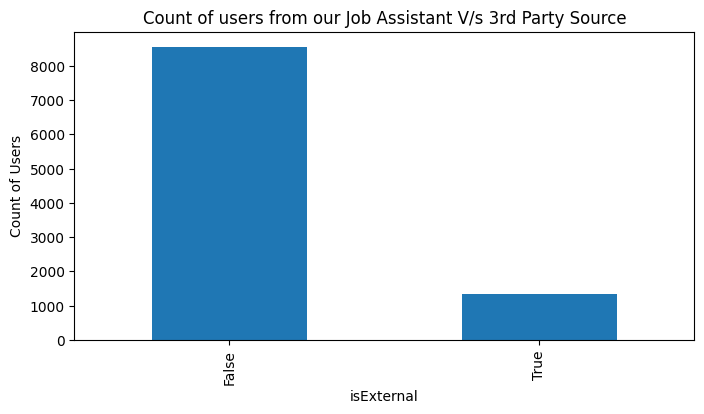

In [16]:
# Plotting the count of leads who take our job assistant or use the 3rd party source for finding jobs.
plt.figure(figsize=(8, 4))
leads['isExternal'].value_counts().plot(kind='bar')
plt.title('Count of users from our Job Assistant V/s 3rd Party Source')
plt.ylabel('Count of Users')
plt.show()

### We See that majority of the users came from our Job Assistant

In [17]:
# Lead Source Analysis: getting the count of different types of lead sources.
lead_sources = leads['source'].value_counts()
lead_sources

source
Referrals                           3658
API                                 1233
WhatsApp OptIn Form                 1138
Facebook                             654
unknown                              369
                                    ... 
patna-18-30yo-gt10k-rep1-july-19       1
fb-localtraits-bangalore-sept18        1
PWA                                    1
Ola/Uber/Move in synk                  1
Quikr SMS                              1
Name: count, Length: 108, dtype: int64

## Plotting the top 5 types of sources of leads generated

In [18]:
top_5_sources = leads['source'].value_counts().head(5)
relative_percentages = (top_5_sources / len(leads['source'])) * 100 # realtive % of those top 5 sources.

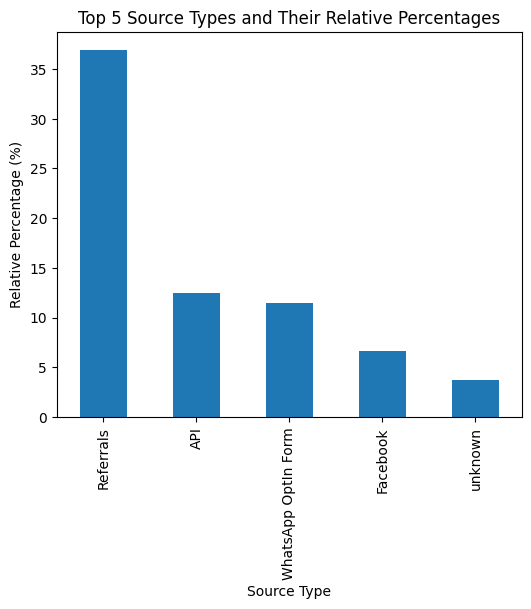

In [19]:
plt.figure(figsize=(6, 5))
relative_percentages.plot(kind='bar')
plt.title('Top 5 Source Types and Their Relative Percentages')
plt.xlabel('Source Type')
plt.ylabel('Relative Percentage (%)')
plt.show()

##### We see that most of the leads came through:- referrals, api, whatsapp, facebook

In [20]:
# Number of leads created over time
leads_over_time = leads.set_index('createdAt').resample('M').size()
leads_over_time

createdAt
2019-12-31 00:00:00+00:00    9916
Freq: M, dtype: int64

In [21]:
# all the data have been created on the same day.
# probably it's the date of creation of the leads table.

In [22]:
# Phone numbers:
leads['phoneNumber'].value_counts()

phoneNumber
1234567890    9916
Name: count, dtype: int64

From  Above analysis we find that `CreatedAt` column and `phoneNumber` are just a constant value
so we can get rid of those 2 columns

In [23]:
# Dropping the createdAt and phoneNumber columns
leads.drop(['createdAt','phoneNumber'], axis=1, inplace = True)

In [24]:
leads.sample(5)

id  \
4881  8070d0b4-0599-4ab1-9ed0-fc740207402c   
5989  9ba937ae-8f8b-4217-a4bb-202434fadd5d   
5744  96356dde-f8c3-4d56-91f0-180d395409b5   
7291  bcc2c14c-e0ac-4006-afff-a67877322b17   
8540  dc4415ec-6c31-49b4-8d39-493dc260611d   

                                    userId                  name       city  \
4881  ac79e807-046a-4ac0-be4b-5392d0cd9f3f         Swmya Unknown  Bangalore   
5989                               Unknown       Santosh Unknown  Hyderabad   
5744  f473eb39-5787-4ad6-841e-40734b155771  Katepally Sharath Ch  Hyderabad   
7291                               Unknown            SREENIVASA    Missing   
8540  6d598f79-71a0-4f50-9466-7d33c68df380           Jayakumar K    Chennai   

           state          source  isExternal                receivedAt  
4881   Karnataka       Referrals       False 2019-10-14 23:10:00+00:00  
5989   Telangana    Reused Leads       False 2019-07-25 00:00:00+00:00  
5744   Telangana       Referrals       False 2019-04-15 00:23:00+00:00  
7291     Missing  Airavatha data        True 2019-11-01 05:41:00+00:00  
8540  Tamil Nadu       Referrals       False 2019-06-12 00:00:00+00:00

# Analyzing the trends for different time components of "receivedAt" column.

In [25]:
# ------------------------------ Days -------------------------
trends_by_day = leads['receivedAt'].dt.day_name().value_counts().sort_index()
# the correct order of days
correct_order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindexing the Series with the correct order of days:-
trends_by_day = trends_by_day.reindex(correct_order_days)


In [26]:
trends_by_day
# most of the calls are made on the weekdays

receivedAt
Monday       1299
Tuesday       635
Wednesday    2229
Thursday     3160
Friday       1164
Saturday      558
Sunday        871
Name: count, dtype: int64

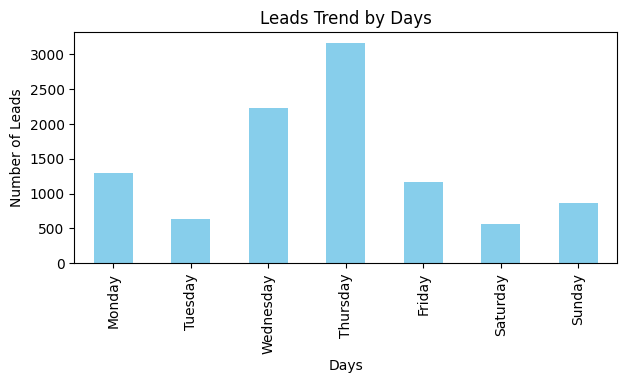

In [27]:
# Plotting the trend
plt.figure(figsize=(7, 3))
trends_by_day.plot(kind='bar', color='skyblue')
plt.title('Leads Trend by Days')
plt.xlabel('Days')
plt.ylabel('Number of Leads')
plt.show()

Key findings from the above leads trend by days:-
1. Most of the calls have been made on the weekdays

In [28]:
# Getting the value count of months from the given datetime format.
trends_by_month = leads['receivedAt'].dt.month_name().value_counts().sort_index()
# Define the correct order of months
correct_order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Reindex the Series with the correct order of month
trends_by_month = trends_by_month.reindex(correct_order_month)
trends_by_month

receivedAt
January         NaN
February        6.0
March          85.0
April         906.0
May          1716.0
June         1264.0
July         2801.0
August        858.0
September     122.0
October       850.0
November     1308.0
December        NaN
Name: count, dtype: float64

In [29]:
# Fill NaN values with 0 and converting their datatype from float to integer.
trends_by_month = trends_by_month.fillna(0)
trends_by_month=trends_by_month.astype(int)
trends_by_month

receivedAt
January         0
February        6
March          85
April         906
May          1716
June         1264
July         2801
August        858
September     122
October       850
November     1308
December        0
Name: count, dtype: int32

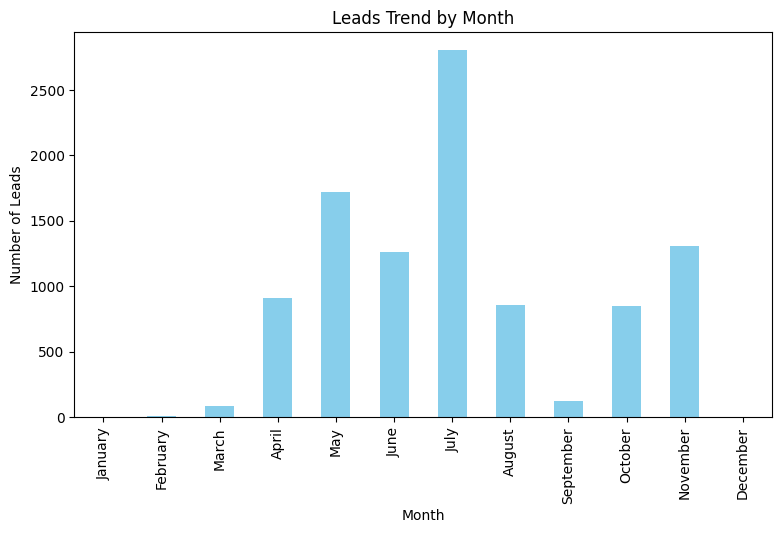

In [30]:
# Plotting the trend
plt.figure(figsize=(9, 5))
trends_by_month.plot(kind='bar', color='skyblue')
plt.title('Leads Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Leads')
plt.show()

Key Findings from the above monthwise distribution of leads:-
1.  Most of the users came to use in Month of May, june, july.
2. Actually an increasing pattern was observed from january till july.
3. And again it started increasing from september till November.

# Across features relationships

### Relationship between the month of leads received and [Our Job Assistant/External Source]

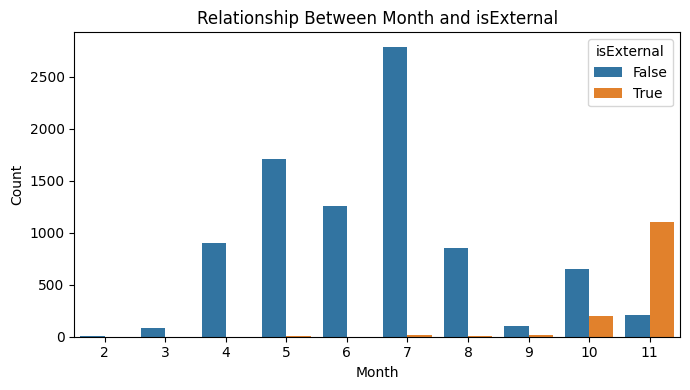

In [31]:
# Extracting the month component within the groupby operation
month_external_group = leads.groupby([leads['receivedAt'].dt.month, 'isExternal']).size().reset_index(name='count')
month_external_group.columns = ['received_month', 'isExternal', 'count']

# Visualizing the relationship between months and isExternal
plt.figure(figsize=(7, 4))
sns.barplot(x='received_month', y='count', hue='isExternal', data=month_external_group)
plt.title('Relationship Between Month and isExternal')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Key Findings:--
## we can see that most of the 3rd party sources leads are coming at the end of months.
This might indicate the following possiblilities:-
1. The 3rd party sources are particularly effective in these intensified periods, possibly due
   to promotional activities or special offers designed to meet monthly quotas.
2. This could ensure optimal engagement with these type of leads when they are most likely to convert.
3. Understanding this pattern can help in planning the lead nurturing process. For instance, if leads tend to cool off at the beginning of a month, strategies can be developed to maintain interest and engagement during these quieter periods.

## Third_party_leads V/s Source types &&  internal_leads V/s Source types

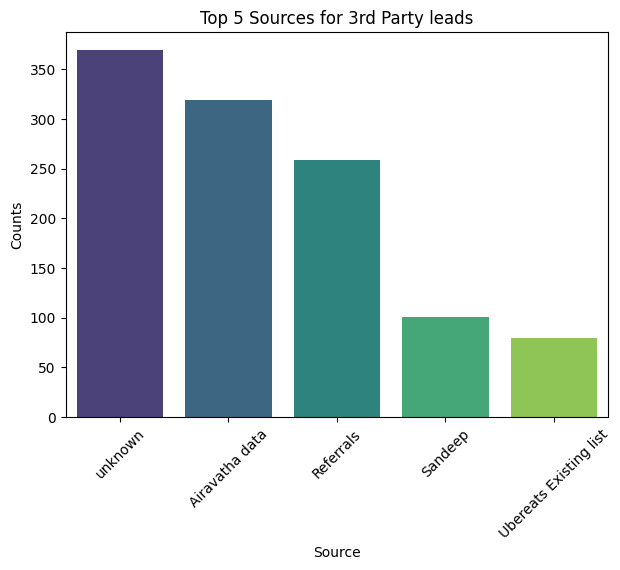

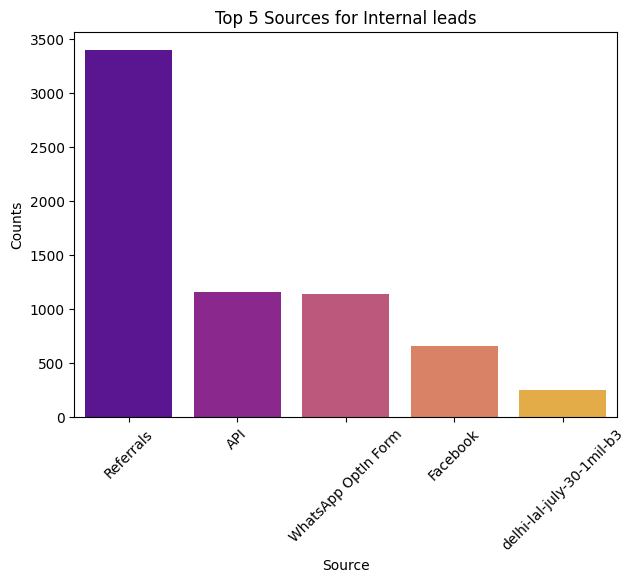

In [32]:
# Separating the data into two subsets based on the 'isExternal' value
Third_party_leads = leads[leads['isExternal'] == True]
internal_leads = leads[leads['isExternal'] == False]

# Counting the occurrences of each source within each subset
ThirdParty_source_counts = Third_party_leads['source'].value_counts().reset_index()
internal_source_counts = internal_leads['source'].value_counts().reset_index()

# Renaming columns for clarity
ThirdParty_source_counts.columns = ['source', 'counts']
internal_source_counts.columns = ['source', 'counts']

# Plotting the results for external sources
plt.figure(figsize=(7, 5))
sns.barplot(x='source', y='counts', data=ThirdParty_source_counts.head(5), palette='viridis')
plt.title('Top 5 Sources for 3rd Party leads')
plt.xlabel('Source')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.show()

# Plotting the results for internal sources
plt.figure(figsize=(7, 5))
sns.barplot(x='source', y='counts', data=internal_source_counts.head(5), palette='plasma')
plt.title('Top 5 Sources for Internal leads')
plt.xlabel('Source')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.show()


### since most of the internal leads are coming through 'referrals' let's see the distribution of this source across cities.

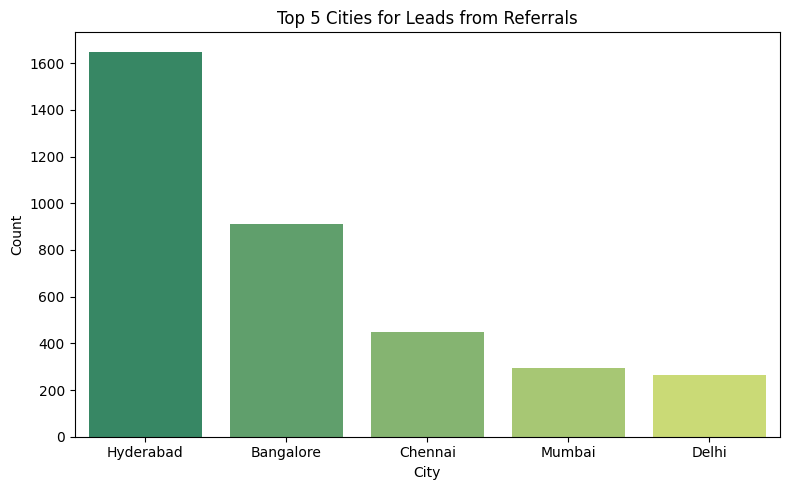

In [33]:
# Getting the top 5 cities for 'Referrals'
top_cities_referrals = leads[leads['source'] == 'Referrals']['city'].value_counts().head(5).reset_index()
top_cities_referrals.columns = ['city', 'count']

# Plotting the top 5 cities for 'Referrals'
plt.figure(figsize=(8, 5))
sns.barplot(x='city', y='count', data=top_cities_referrals, palette='summer')
plt.title('Top 5 Cities for Leads from Referrals')
plt.xlabel('City')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Findings:-
 Most of them are coming from Hyderabad

# 2. Lead_calls Dataset

In [34]:
# Loading the lead_calls dataset for analysis
lead_calls = pd.read_csv("lead_calls.csv" , encoding='latin-1')

In [35]:
lead_calls.shape

(12335, 8)

In [36]:
# Exploring the datasets for missing values and data types
lead_calls_info = lead_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12335 entries, 0 to 12334
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            12335 non-null  object
 1   telecallerId  12335 non-null  object
 2   leadId        12335 non-null  object
 3   client        11491 non-null  object
 4   status        12335 non-null  object
 5   comments      3521 non-null   object
 6   calledAt      12335 non-null  object
 7   createdAt     12335 non-null  object
dtypes: object(8)
memory usage: 771.1+ KB


In [37]:
# checking the % of missing values in all different features:
lead_calls.isnull().mean()*100

id               0.000000
telecallerId     0.000000
leadId           0.000000
client           6.842319
status           0.000000
comments        71.455209
calledAt         0.000000
createdAt        0.000000
dtype: float64

Around ``` 71%  ```of comments are missing
 and around ```6.8%``` client details are missing

So it's better to drop the `comment` columns and label the missing clients as `Missing Client`

 For time being we'll keep the comment column and let's see what new can be done from them

In [38]:
# filling the missing clients with a new label "Missing Client" as removing them might lead to the loss of information
lead_calls['client'] = lead_calls['client'].fillna('Missing Clients')

In [39]:
lead_calls.isnull().sum()

id                 0
telecallerId       0
leadId             0
client             0
status             0
comments        8814
calledAt           0
createdAt          0
dtype: int64

##### Clearly all the missing values other than comments have been handled, Now we can proceed ahead with futher analysis

In [40]:
#  Checking any possible duplicacy:
lead_calls.duplicated().sum()

0

No duplicate rows are there in our lead_calls dataset

In [41]:
# Converting the date time columns (object type) in standard format (datetime):
lead_calls['calledAt'] = pd.to_datetime(lead_calls['calledAt'], utc=True,format='ISO8601')
lead_calls['createdAt'] = pd.to_datetime(lead_calls['createdAt'],utc=True,format='ISO8601')

It seems that all createdAt feature is having some constant values, let's examine it

In [42]:
# resampling the createdAt time feature on daily basis:
lead_calls_over_time = lead_calls.set_index('createdAt').resample('D').size()
len(lead_calls_over_time) # checking the count of days of creation of dataset. 

1

We can see that the column `createdAt` just a constant value probably it's the day of creation of this table dataset.
So better to get rid of this column as well as it will be of less importance.

In [43]:
# dropping the 'createdAt' column
lead_calls.drop(['createdAt'], axis=1, inplace = True)

In [44]:
lead_calls.sample(3)

id  \
8345  ae89c3e0-3447-4de2-9a90-57309c696bd8   
7295  98f28ff2-9139-4246-bb13-422b5a6686db   
5054  69aa03b9-9470-4dc8-9fac-dbef6e6b6cc3   

                              telecallerId  \
8345  fd904600-1e6e-4ab2-8be9-d7903aed9d3d   
7295  fd904600-1e6e-4ab2-8be9-d7903aed9d3d   
5054  fd904600-1e6e-4ab2-8be9-d7903aed9d3d   

                                    leadId     client  \
8345  ad05f82e-7e2e-4144-ad44-8d54ed8f8a10  Uber Eats   
7295  4df11914-c304-4b4f-a24e-4fdb559b09a9     Zomato   
5054  076e6324-5fca-482a-b568-d761fd53c5eb     Swiggy   

                              status comments                  calledAt  
8345   Not Interested - Wrong Number      NaN 2019-10-23 15:30:00+00:00  
7295         Don't Meet Requirements  No Bike 2020-05-01 10:30:00+00:00  
5054  CNP/Switched Off/Not Reachable      NaN 2019-07-25 12:30:00+00:00

## Analyzing the ```status``` feature

In [45]:
# No of unique status in the lead_call dataset
len(lead_calls['status'].unique())

48

In [46]:
# to lower case to so that similar meaning status can be identified as single entity.
lead_calls['status'] = lead_calls['status'].str.lower()

In [47]:
## Getting the value count of all the different status types
lead_calls['status'].value_counts()

status
cnp/switched off/not reachable                                     3826
wrong number/number not valid                                       816
very interested                                                     794
rnr                                                                 651
not interested - disconnected the call                              615
not interested - got other jobs                                     501
not interested - not applied                                        425
not interested                                                      406
interested                                                          350
not applied                                                         340
not interested - wrong number                                       312
don't meet requirements                                             307
other reasons                                                       287
switched off/not reachable                               

From the above value count, we see that most of the status are belonging to switched off.
Also there are different status type depicting similar meaning.
So we must club similar meaning status under single type.

In [48]:
# Labelling all the not intersted types of status as negative using regular expression:-
lead_calls['status'] = lead_calls['status'].str.replace(r'not interested.*', 'negative', regex=True)
# handling (wrong number, invalid number) types of statuses as "wrong number".
lead_calls['status'] = lead_calls['status'].str.replace(r'.*number not valid.*', 'wrong number', regex=True)

In [49]:
# Labelling switched off types of regular expression status as switched off:
lead_calls['status'] = lead_calls['status'].str.replace(r'.*switched off.*', 'switched off', regex=True)

In [50]:
# Now more clarity let's label interseted status as "positive" engagemements.
lead_calls['status'] = lead_calls['status'].str.replace(r'.*interested.*', 'positive', regex=True)

In [51]:
# Handling the other negative types of statuses.
# following list contains the similar types of negative status.
import re
negative_statuses = ['not applied', "don't meet requirements", 'disconnected the call','applied by mistake',
                     'joined','got other jobs','language barrier','wrong number','want non-delivery jobs','not sure','location issue',
                     'applied for someone else','want other delivery jobs'
                    ]
# list of switched off status
inaccessible_statues = ['switched off']
# list of call back and positive status
positive_statues = ['call back', 'positive']

# Creating a regular expression pattern to match any of the specified negative statuses
neg_pattern = '|'.join(map(re.escape, negative_statuses))
inacc_pattern =  '|'.join(map(re.escape, inaccessible_statues))
pos_pattern  = '|'.join(map(re.escape, positive_statues))

# replacing the above list of similar items with the corresponding labels.
lead_calls['status'] = lead_calls['status'].str.replace(neg_pattern, 'negative', regex=True)
lead_calls['status'] = lead_calls['status'].str.replace(inacc_pattern, 'inaccessible', regex=True)
lead_calls['status'] = lead_calls['status'].str.replace(pos_pattern, 'positive', regex=True)

In [52]:
lead_calls['status'].value_counts()

status
negative         5848
inaccessible     4352
positive         1197
rnr               651
other reasons     287
Name: count, dtype: int64

Similar types of status have been categorized under similar types of status.

## Handling the ```calledAt``` feature

### Time-based Analysis

In [53]:
# Group by year and count their occurrences
year_counts = lead_calls['calledAt'].dt.year.groupby(lead_calls['calledAt'].dt.year).size()
year_counts

calledAt
2016       1
2019    8143
2020    4191
Name: calledAt, dtype: int64

We can see that the year ```2016``` is having frequency of ```1```. Better to get rid of this entry since it might be the case of 
ambiguity encountered while data collection 

In [54]:
# Removing the data for year 2016
lead_calls = lead_calls[lead_calls['calledAt'].dt.year != 2016]

## Month and Day wise analysis of lead calls.

In [55]:
## ------------------------- Months ----------------------------
trends_by_month = lead_calls['calledAt'].dt.month_name().value_counts().sort_index()
# correct order of months 
correct_order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Reindex the Series with the correct order of month
trends_by_month = trends_by_month.reindex(correct_order_month)

# ------------------------------ Days -------------------------
trends_by_day = lead_calls['calledAt'].dt.day_name().value_counts().sort_index()
# the correct order of days
correct_order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindexing the Series with the correct order of days:-
trends_by_day = trends_by_day.reindex(correct_order_days)


In [56]:
# Fill NaN values in month with 0 
trends_by_month = trends_by_month.fillna(0)
trends_by_month=trends_by_month.astype(int)
trends_by_month

calledAt
January         0
February        0
March           0
April        1308
May          1872
June         1001
July         1591
August       2740
September     203
October      1788
November     1610
December      221
Name: count, dtype: int32

### year + month wise analysis of lead_calls.

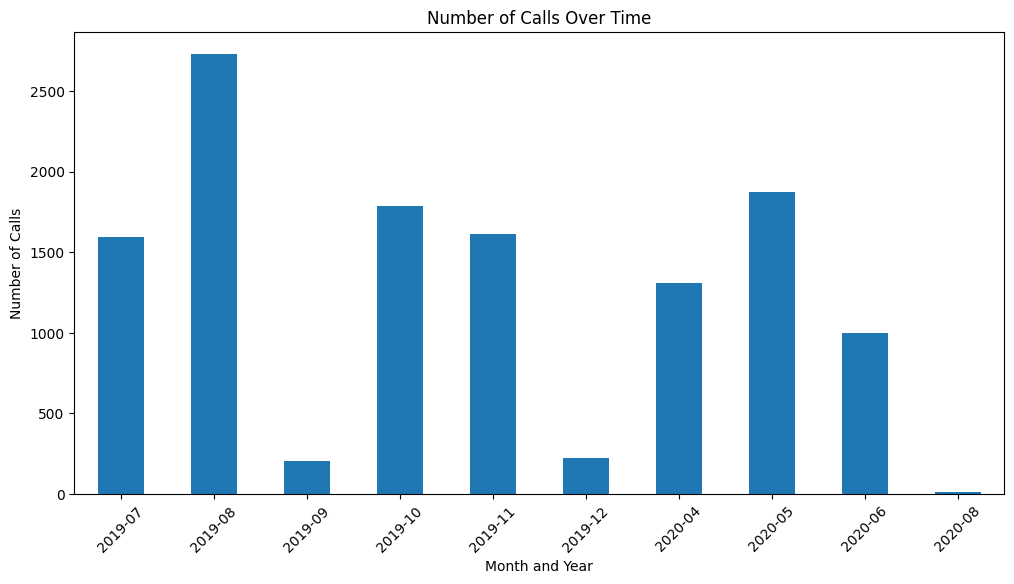

In [57]:
# Extracting month and year from 'calledAt' and Counting calls per month
calls_per_month_year = lead_calls['calledAt'].dt.to_period('M').value_counts().sort_index()

# Plotting the trend of calls over time
plt.figure(figsize=(12, 6))
calls_per_month_year.plot(kind='bar')
plt.title('Number of Calls Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.show()


In [58]:
import plotly.express as px

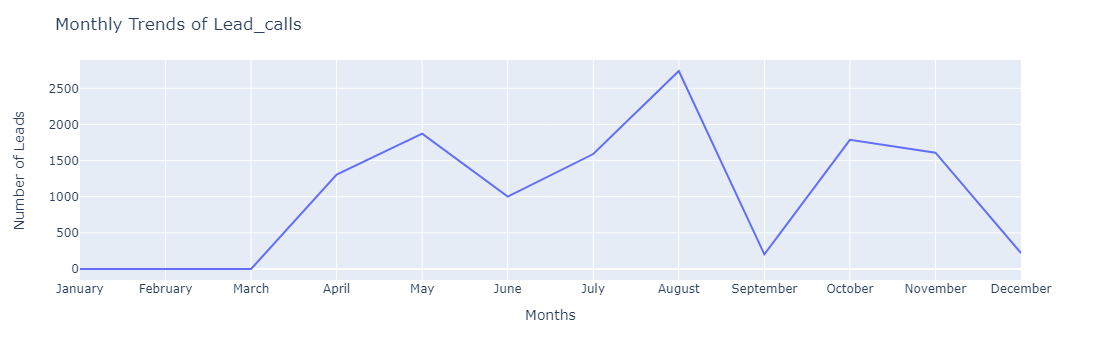

In [59]:
# Creating a line chart month wise for both the years.
fig = px.line(x=trends_by_month.index, y=trends_by_month.values, labels={'x': 'Months', 'y': 'Number of Leads'})
fig.update_layout(title='Monthly Trends of Lead_calls', xaxis_title='Months', yaxis_title='Number of Leads')
fig.show()

Most of the calls have been done in the month ranging [March to November], with August having the maximum of all

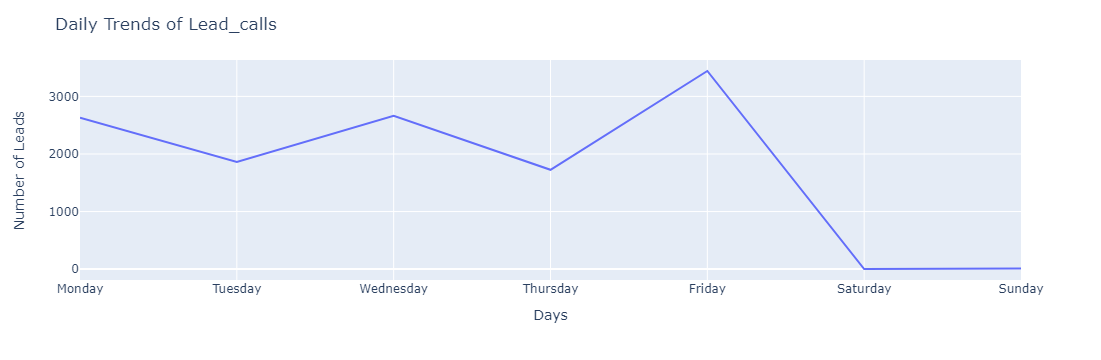

In [60]:
# Creating a line chart for day v/s no of lead_calls
fig = px.line(x=trends_by_day.index, y=trends_by_day.values, labels={'x': 'Days', 'y': 'Number of Leads'})
fig.update_layout(title='Daily Trends of Lead_calls', xaxis_title='Days', yaxis_title='Number of Leads')
fig.show()


From the line chart we can see that mostly the calls made by the telecaller are on the weekdays, and around 0 calls on weekends

# Word cloud

In [61]:
from wordcloud import WordCloud 

In [62]:
# Function to generate and display a word cloud
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data)
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    print("*********************************************************************")

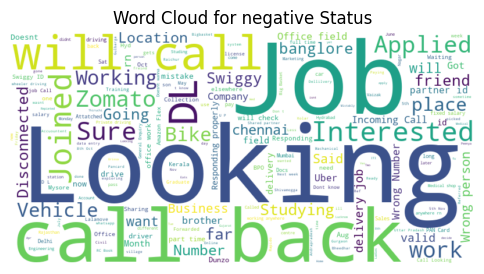

*********************************************************************


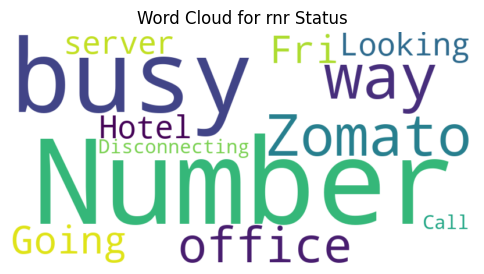

*********************************************************************


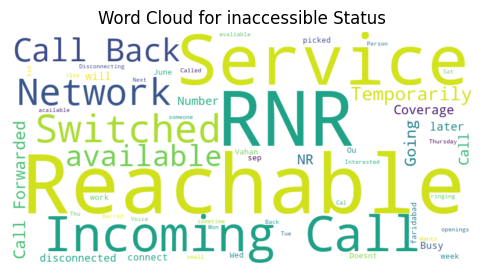

*********************************************************************


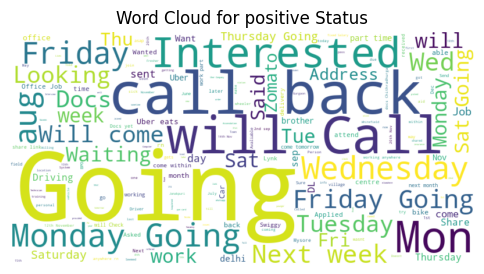

*********************************************************************


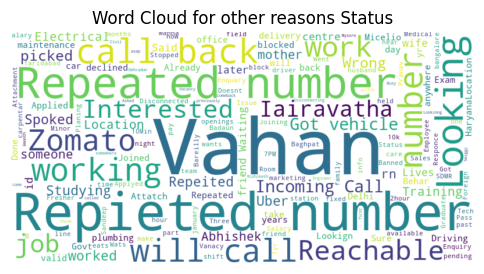

*********************************************************************


In [63]:
# Filtering comments for each status type and generate word clouds
for status in lead_calls['status'].unique():
    # getting all the different types of status (after dropping the missing values)
    comments = ' '.join(lead_calls[lead_calls['status'] == status]['comments'].dropna())
    generate_wordcloud(comments, f"Word Cloud for {status} Status")


## Findings from the Word cloud of different status types.


```Negative Status:```

Prominent words like "Looking", "Job", and "call back" suggest that many calls may relate to job inquiries or job-related discussions where the outcome was not positive.

```RNR Status (Ring No Response):```

The word "busy" is prominent, which could indicate that calls are often not answered because the recipient is busy.

Other terms like "office" and "Number" might imply that calls during working hours or issues with contact information contribute to the RNR status.

```Inaccessible Status:```

Words such as "Service", "Reachable", and "Network" suggest that calls often cannot be completed due to service issues or network problems.

"Incoming", "Call Forwarded", and "Switched" might indicate that technical reasons are a common cause of inaccessibility.

```Positive Status:```

The word "Interested" appears again, likely indicating that interest expressed on calls correlates with a positive outcome.

```Other Reasons Status:```

"Repeated number" and variations like "Repeated" and "number" are very prominent, hinting at issues with contact numbers being a common reason for calls being categorized under 'other reasons'.

"Working" and "Interested" suggest that the status might be related to employment status or job interest, but not fitting neatly into the positive or negative categories.

### 1. Distribution of lead calls by status type

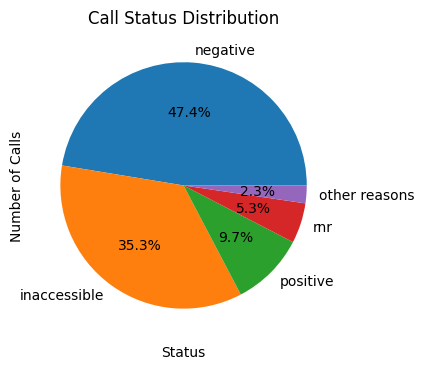

In [64]:
# value count for each of the lead_calls types
status_distribution = lead_calls['status'].value_counts()
# Plotting the distribution of calls by status
plt.figure(figsize=(7, 4))
status_distribution.plot(kind='pie',autopct='%1.1f%%')
plt.title('Call Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Calls')
plt.show()

Only around `10%` of the calls are turning out to be `+ve` 

### 2. Analysis of calls per client

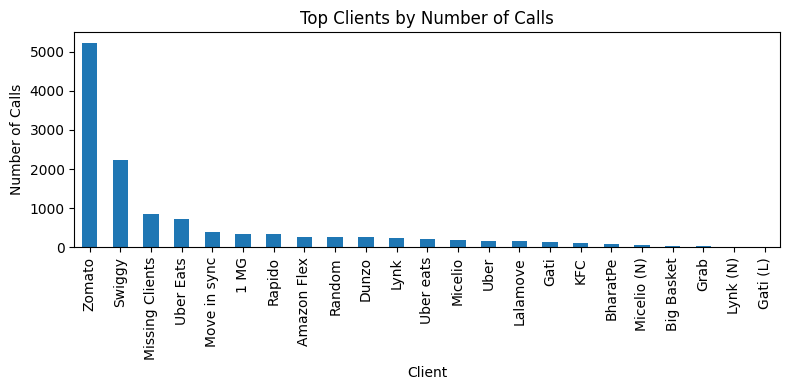

In [65]:
calls_per_client = lead_calls['client'].value_counts()
# Plot for analysis of calls per client
plt.figure(figsize=(8, 4))
calls_per_client.plot(kind='bar')  # Showing top 10 for clarity
plt.title('Top Clients by Number of Calls')
plt.xlabel('Client')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()

We find that most of the calls have been made targetting ```Zomato``` and ```Swiggy```

In [66]:
# relative % of top 2 clients 
top_2_employer = lead_calls['client'].value_counts().head(2)
relative_percentage_top_2_employer = (top_2_employer/len(lead_calls['client']))*100
relative_percentage_top_2_employer

client
Zomato    42.443652
Swiggy    18.120642
Name: count, dtype: float64

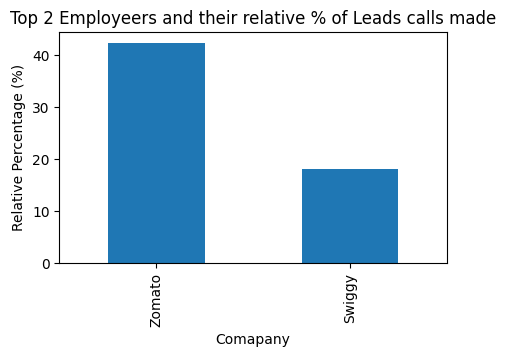

In [67]:
plt.figure(figsize=(5, 3))
relative_percentage_top_2_employer.plot(kind='bar')
plt.title('Top 2 Employeers and their relative % of Leads calls made')
plt.xlabel('Comapany')
plt.ylabel('Relative Percentage (%)')
plt.show()

More than ```60% ``` of the leads are targetting for these two companies.

# Relationship between different features

# Clients V/s Status types

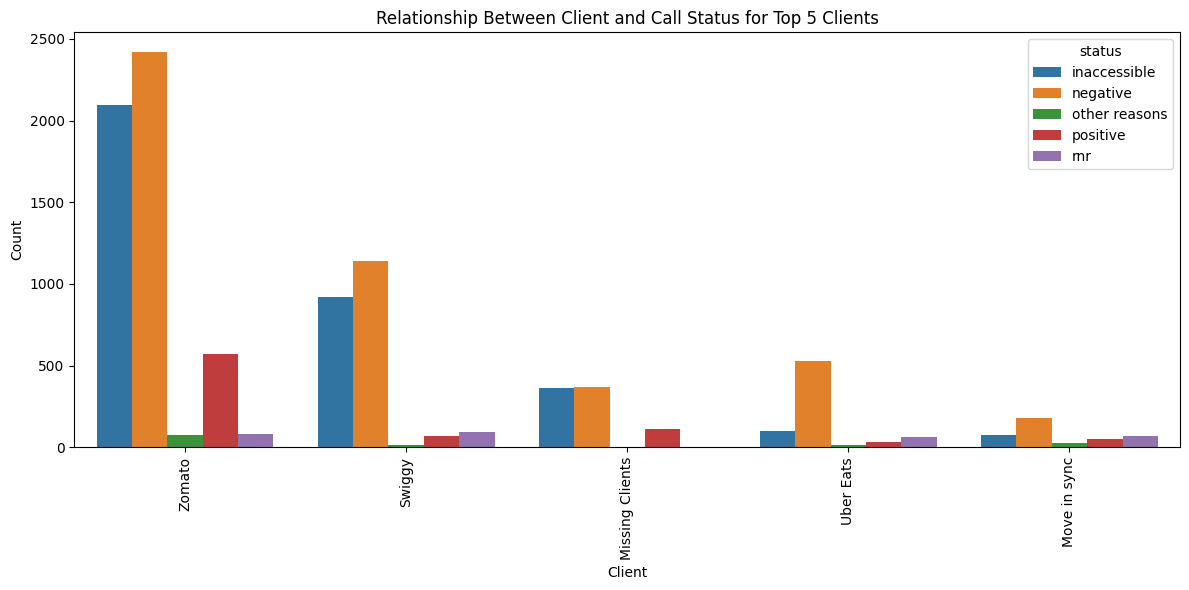

In [68]:
# Grouping by 'client' and 'status', then counting occurrences
client_status_group = lead_calls.groupby(['client', 'status']).size().reset_index(name='count')

# Finding the total calls made for each company
total_calls_per_client = client_status_group.groupby('client')['count'].sum().reset_index()
total_calls_per_client = total_calls_per_client.sort_values(by='count', ascending=False).head(5)

# Filtering the original group for only the top 5 clients
top_clients = total_calls_per_client['client']
client_status_group_top = client_status_group[client_status_group['client'].isin(top_clients)]

# Sorting by total calls per client and then by status within each client
client_status_group_top_sorted = client_status_group_top.merge(total_calls_per_client, on='client', suffixes=('', '_total'))
client_status_group_top_sorted = client_status_group_top_sorted.sort_values(by=['count_total', 'client', 'status'], ascending=[False, True, True])

# Visualizing the relationship between 'client' and 'status' for the top 5 clients
plt.figure(figsize=(12, 6))
sns.barplot(x='client', y='count', hue='status', data=client_status_group_top_sorted)
plt.title('Relationship Between Client and Call Status for Top 5 Clients')
plt.xticks(rotation=90)
plt.xlabel('Client')
plt.ylabel('Count')
plt.tight_layout()
# Show the plot
plt.show()


From the above bar plots we find that the % of +ve conversion is highest for zomato.Also Zomato has the maximum of negative and inaccessible calls 

# Call Outcomes over Different Hours of the Day

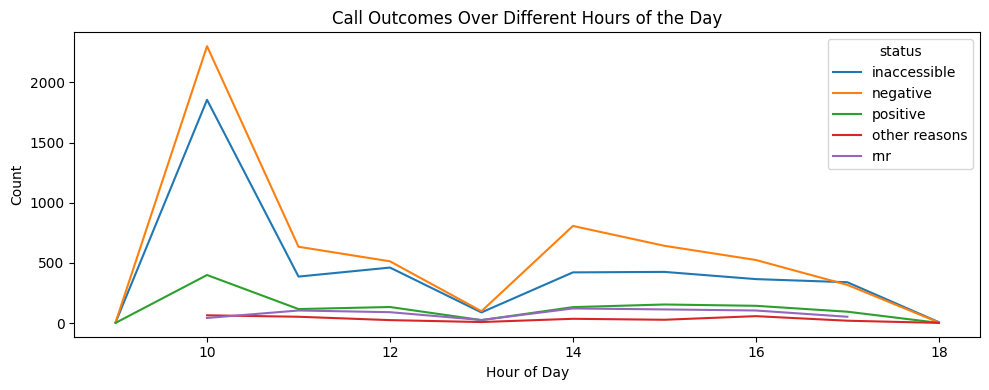

In [69]:
# Grouping by hour and status
hourly_call_outcomes = lead_calls.groupby([lead_calls['calledAt'].dt.hour, 'status']).size().reset_index(name='count')
hourly_call_outcomes.columns = ['call_hour', 'status', 'count']

# Visualizing call outcomes over different hours of the day
plt.figure(figsize=(10, 4))
sns.lineplot(x='call_hour', y='count', hue='status', data=hourly_call_outcomes)
plt.title('Call Outcomes Over Different Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Key Findings:-
1. Most of the calls are made in the initial hours of the day around 10.00 am morning.
2. And it's obvious from the graph that during lunch and post evening the call made become too less or 0

# Positive leads rate over different hours of a day

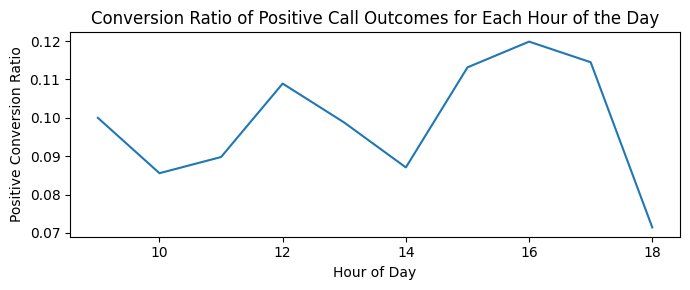

In [70]:
# Grouping by hour and status, then counting occurrences
hourly_status_counts = lead_calls.groupby([lead_calls['calledAt'].dt.hour, 'status']).size().reset_index(name='count')
hourly_status_counts.columns = ['call_hour', 'status', 'count']

# Isolating counts for positive call outcomes
positive_outcomes = hourly_status_counts[hourly_status_counts['status'] == 'positive']

# Calculating total calls per hour
total_calls_per_hour = lead_calls.groupby(lead_calls['calledAt'].dt.hour).size().reset_index(name='total_calls')
total_calls_per_hour.columns = ['call_hour', 'total_calls']

# Merging positive outcomes with total calls
positive_merged = pd.merge(positive_outcomes, total_calls_per_hour, how='left', on='call_hour')

# Calculating the ratio of positive calls per hour
positive_merged['positive_ratio'] = positive_merged['count'] / positive_merged['total_calls']

# Plotting the positive conversion ratio for each hour
plt.figure(figsize=(7, 3))
sns.lineplot(data=positive_merged, x='call_hour', y='positive_ratio')
plt.title('Conversion Ratio of Positive Call Outcomes for Each Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Positive Conversion Ratio')
plt.tight_layout()
plt.show()

Key findings for Positive call rates:-
1. The conversion ratio of positive outcomes shows fluctuations throughout the day, with peaks around mid-morning and mid-afternoon. This suggests that these may be the best times to reach out to leads for a positive response.
2. The drop in positive outcomes towards the end of the workday could indicate that leads are winding down and may not be interested in engaging in new conversations.

# RNR  rate over different hours of a day

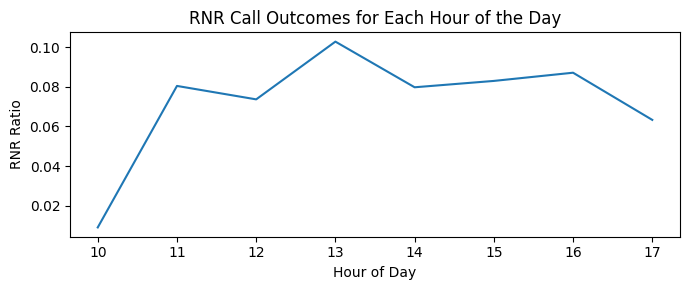

In [71]:
# Grouping by hour and status, then counting occurrences
hourly_status_counts = lead_calls.groupby([lead_calls['calledAt'].dt.hour, 'status']).size().reset_index(name='count')
hourly_status_counts.columns = ['call_hour', 'status', 'count']

# Isolating counts for RNR call outcomes
rnr_outcomes = hourly_status_counts[hourly_status_counts['status'] == 'rnr']

# Calculating total calls per hour
total_calls_per_hour = lead_calls.groupby(lead_calls['calledAt'].dt.hour).size().reset_index(name='total_calls')
total_calls_per_hour.columns = ['call_hour', 'total_calls']

# Merging positive outcomes with total calls
rnr_merged = pd.merge(rnr_outcomes, total_calls_per_hour, how='left', on='call_hour')

# Calculating the ratio of RNR calls per hour
rnr_merged['rnr_ratio'] = rnr_merged['count'] / rnr_merged['total_calls']

# Plotting the RNR conversion ratio for each hour
plt.figure(figsize=(7, 3))
sns.lineplot(data=rnr_merged, x='call_hour', y='rnr_ratio')
plt.title('RNR Call Outcomes for Each Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('RNR Ratio')
plt.tight_layout()
plt.show()

Key findings for RNR (ring no response) call rates:-
1. The RNR rate is relatively stable throughout the day with slight variations. 
However, there's a noticeable dip in the late afternoon. This might suggest that leads are more likely to answer calls during the early part of the day or later towards the evening.
2. The RNR rate is relatively stable throughout the day with slight variations. However, there's a noticeable dip in the late afternoon. This might suggest that leads are more likely to answer calls during the early part of the day or later towards the evening.


            

# Negative leads rate over different hours of a day

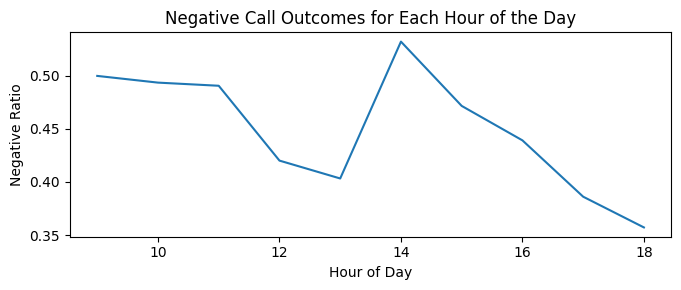

In [72]:
# Grouping by hour and status, then counting occurrences.
hourly_status_counts = lead_calls.groupby([lead_calls['calledAt'].dt.hour, 'status']).size().reset_index(name='count')
hourly_status_counts.columns = ['call_hour', 'status', 'count']

# Isolating counts for negative call outcomes
negative_outcomes = hourly_status_counts[hourly_status_counts['status'] == 'negative']

# Calculating total calls per hour
total_calls_per_hour = lead_calls.groupby(lead_calls['calledAt'].dt.hour).size().reset_index(name='total_calls')
total_calls_per_hour.columns = ['call_hour', 'total_calls']

# Merging negative outcomes with total calls
negative_merged = pd.merge(negative_outcomes, total_calls_per_hour, how='left', on='call_hour')

# Calculating the ratio of negative calls per hour
negative_merged['negative_ratio'] = negative_merged['count'] / negative_merged['total_calls']

# Plotting the negative conversion ratio for each hour
plt.figure(figsize=(7, 3))
sns.lineplot(data=negative_merged, x='call_hour', y='negative_ratio')
plt.title('Negative Call Outcomes for Each Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Negative Ratio')
plt.tight_layout()
plt.show()

Key findings for negative lead call rates:-
1. The highest rate of negative outcomes seems to occur around midday. This could be due to various factors such as leads being busy during lunch hours or experiencing midday work pressure, which might make them less receptive to calls.
2. The rate of negative outcomes decreases as the day progresses, especially after peak business hours. This might indicate that leads are more available and potentially more receptive later in the day.

# ____________________ Telecallers dataset ________________________

# 3. Telecallers dataset 

In [73]:
# loading the dataset
telecallers = pd.read_csv("telecallers.csv", encoding='latin-1')

In [74]:
telecallers.shape # shape of the dataset

(5, 4)

In [75]:
# this dataset basically gives info about the telecallers.

In [76]:
telecallers.head()

id      name  phoneNumber  \
0  4248b521-ce3f-4897-a30d-35c9ee81f746     Amila   1234567890   
1  fd904600-1e6e-4ab2-8be9-d7903aed9d3d    Sheeba   1234567890   
2  7717ef5d-38ec-44df-af3b-7a2446071e48     Islam   1234567890   
3  89b29324-8f3b-4b50-b3f7-0a3e0918e4d2  Rakshith   1234567890   
4  87112942-9c14-401a-9231-d9b4c2eee0c5    Manasa   1234567890   

                  createdAt  
0  2019-12-25T05:50:26.375Z  
1  2019-12-25T05:50:26.385Z  
2  2019-12-25T05:50:26.388Z  
3  2019-12-25T05:50:26.390Z  
4  2019-12-25T05:50:26.393Z

In [77]:
# we see that that phoneNumber and date of table creation are just fixed value across the rows, so we can get rid of them.
telecallers.drop(['phoneNumber','createdAt'], axis=1, inplace=True)

In [78]:
# modified telecaller dataset
telecallers.head()

id      name
0  4248b521-ce3f-4897-a30d-35c9ee81f746     Amila
1  fd904600-1e6e-4ab2-8be9-d7903aed9d3d    Sheeba
2  7717ef5d-38ec-44df-af3b-7a2446071e48     Islam
3  89b29324-8f3b-4b50-b3f7-0a3e0918e4d2  Rakshith
4  87112942-9c14-401a-9231-d9b4c2eee0c5    Manasa

# ----------------- Merged Dataset--------------

# 4. Merging the datasets:

In [79]:
# Merging lead_calls with leads based on the foreign key 
merged_df = pd.merge(lead_calls, leads, left_on='leadId', right_on='id', suffixes=('_call', '_lead'))

# Merging the resulting dataframe with telecallers with proper suffixes of column name.
final_merged_df = pd.merge(merged_df, telecallers, left_on='telecallerId', right_on='id', suffixes=('_lead', '_telecaller'))

In [80]:
final_merged_df.head(2)

id_call                          telecallerId  \
0  00028a99-c401-4048-9b75-b923cff55a79  fd904600-1e6e-4ab2-8be9-d7903aed9d3d   
1  0003dcc7-05d0-4736-a415-5e67ea95c24e  fd904600-1e6e-4ab2-8be9-d7903aed9d3d   

                                 leadId       client    status comments  \
0  724467a5-52d1-4989-a870-99ae65d3e0e8  Amazon Flex  negative      NaN   
1  fea7fb85-3355-4747-98fd-dae1b9aca52a     Lalamove  negative      NaN   

                   calledAt                               id_lead  \
0 2019-07-25 17:00:00+00:00  724467a5-52d1-4989-a870-99ae65d3e0e8   
1 2019-08-30 14:00:00+00:00  fea7fb85-3355-4747-98fd-dae1b9aca52a   

                                 userId       name_lead       city      state  \
0                               Unknown       Shrinivas  Bangalore  Karnataka   
1  eeb57d73-f103-4e75-8606-c4b2a4511d0d  Kamaram Ramesh  Hyderabad  Telangana   

                         source  isExternal                receivedAt  \
0                  Reused Leads       False 2019-02-24 00:00:00+00:00   
1  fb-remarketing-andhra-july18       False 2019-08-21 00:00:00+00:00   

                                     id name_telecaller  
0  fd904600-1e6e-4ab2-8be9-d7903aed9d3d          Sheeba  
1  fd904600-1e6e-4ab2-8be9-d7903aed9d3d          Sheeba

In [81]:
# shape of the final merged dataset:
final_merged_df.shape

(12334, 17)

## Filtering only the relevant features for further analysis:

In [82]:
final_merged_df = final_merged_df[['name_telecaller','name_lead','client','status', 'comments', 'source','isExternal','city','state','calledAt','receivedAt'] ]

In [83]:
final_merged_df.sample(3)

name_telecaller     name_lead     client    status comments  \
3832          Sheeba   Aftab Ahmed     Swiggy  negative      NaN   
8804           Amila     Rubhan gp  Uber Eats       rnr      NaN   
4803          Sheeba  Razi Unknown     Zomato  negative      NaN   

                             source  isExternal       city      state  \
3832                        unknown        True    Missing    Missing   
8804  fb-lookalike-bangalore-sept27       False  Bangalore  Karnataka   
4803                      Referrals       False  Hyderabad  Telangana   

                      calledAt                receivedAt  
3832 2019-10-10 14:00:00+00:00 2019-10-21 00:00:00+00:00  
8804 2019-10-10 11:00:00+00:00 2019-10-04 05:42:00+00:00  
4803 2019-07-23 14:00:00+00:00 2019-06-14 00:00:00+00:00

In [84]:
final_merged_df.shape # shape after modification

(12334, 11)

### Generating a new column based on the difference in time/days between the time of receiving of lead and calling the lead by our telecallers.

In [85]:
# Calculating the difference between 'calledAt' and 'receivedAt' in days
final_merged_df['days_difference'] = (final_merged_df['calledAt'] - final_merged_df['receivedAt']).dt.days

In [86]:
# checking if any negative value exist or not:
final_merged_df[(final_merged_df['days_difference'] < 0)].shape

(333, 12)

We see that the difference b/w the 'calledAt' and 'receivedAt' in days are also ```negative```. 
This might be because of some data errors during data collection. So we'll try getting rid of this inconsistency.


In [87]:
# droppping the rows where the days of difference is negative.
final_merged_df.drop(final_merged_df[final_merged_df['days_difference'] < 0].index,inplace=True)

## Analyzing how call status varies with the difference in days between received and called

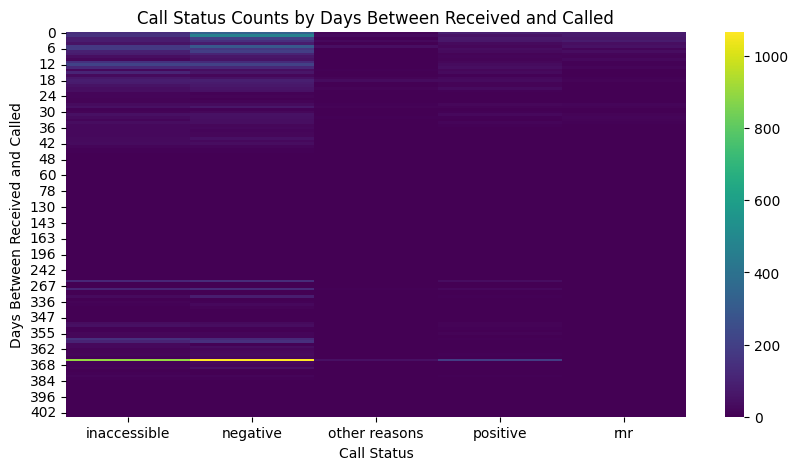

In [88]:
# Grouping data by the 'days_between_received_and_called' and 'status'
grouped_data = final_merged_df.groupby(['days_difference', 'status']).size().unstack(fill_value=0)

# Plotting the heat map from the data
plt.figure(figsize=(10, 5))
sns.heatmap(grouped_data, cmap='viridis', annot=False, fmt="d")
plt.title('Call Status Counts by Days Between Received and Called')
plt.xlabel('Call Status')
plt.ylabel('Days Between Received and Called')
plt.show()

Key findings from this heatmap:-
1. ```Longer Delays and Outcomes:``` For leads that were contacted after a longer delay, there is still a presence of 'positive' outcomes, but it's less frequent compared to negative outcomes, which could imply that the chances of a successful call decrease as the delay increases.
2. ```Positive Outcomes with Prompt Calling:``` There is a visible band of 'positive' outcomes that seem to occur more frequently when the call is made within a short time frame after receiving the lead. This suggests that prompt calling may correlate with more successful outcomes.

In [89]:
final_merged_df.head(3)

name_telecaller       name_lead       client        status comments  \
0          Sheeba       Shrinivas  Amazon Flex      negative      NaN   
1          Sheeba  Kamaram Ramesh     Lalamove      negative      NaN   
2          Sheeba  Kamaram Ramesh     Lalamove  inaccessible      NaN   

                         source  isExternal       city      state  \
0                  Reused Leads       False  Bangalore  Karnataka   
1  fb-remarketing-andhra-july18       False  Hyderabad  Telangana   
2  fb-remarketing-andhra-july18       False  Hyderabad  Telangana   

                   calledAt                receivedAt  days_difference  
0 2019-07-25 17:00:00+00:00 2019-02-24 00:00:00+00:00              151  
1 2019-08-30 14:00:00+00:00 2019-08-21 00:00:00+00:00                9  
2 2019-08-27 15:00:00+00:00 2019-08-21 00:00:00+00:00                6

# Lead Call analysis for each Telecaller

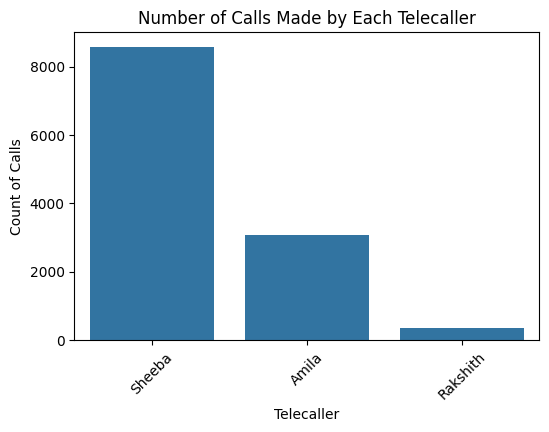

In [90]:
# Creating a count plot for each telecaller to visualize the number of calls made by each one

plt.figure(figsize=(6, 4))
sns.countplot(data=final_merged_df, x='name_telecaller', order=final_merged_df['name_telecaller'].value_counts().index)
plt.title('Number of Calls Made by Each Telecaller')
plt.xlabel('Telecaller')
plt.ylabel('Count of Calls')
plt.xticks(rotation=45)
plt.show()


### % of positive calls for each telecaller,

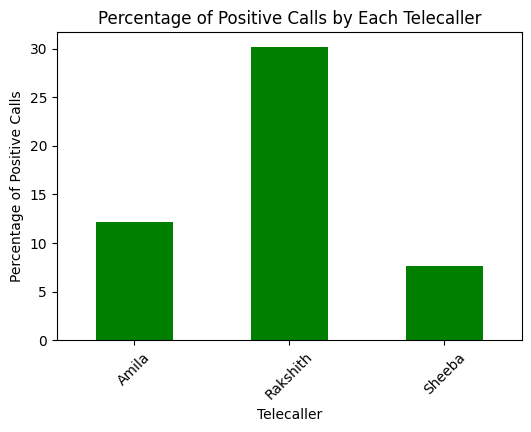

In [91]:
# let's recalculate the total number of calls by each telecaller
total_calls_by_telecaller = final_merged_df.groupby('name_telecaller').size()

# the number of positive calls for each telecaller.
positive_calls_by_telecaller = final_merged_df[final_merged_df['status'] == 'positive'].groupby('name_telecaller').size()

# Now we calculate the percentage of positive calls.
positive_call_percentage = (positive_calls_by_telecaller / total_calls_by_telecaller) * 100

# Let's create a DataFrame for a clear representation
positive_call_percentage_df = positive_call_percentage.reset_index(name='Positive Call Percentage')

# plot of the results
plt.figure(figsize=(6, 4))
positive_call_percentage.plot(kind='bar', color='green')
plt.title('Percentage of Positive Calls by Each Telecaller')
plt.xlabel('Telecaller')
plt.ylabel('Percentage of Positive Calls')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

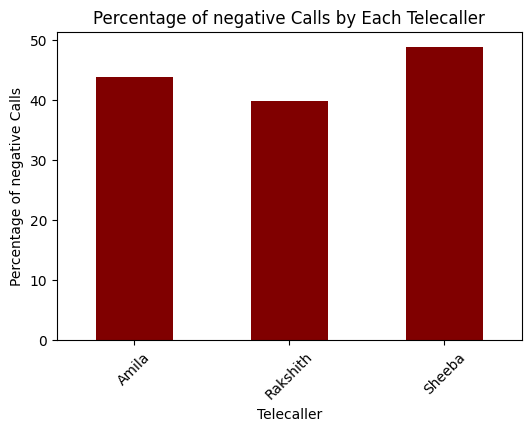

In [92]:
# negative call status:
total_calls_by_telecaller = final_merged_df.groupby('name_telecaller').size()

# Then we calculate the number of negative calls for each telecaller.
negative_calls_by_telecaller = final_merged_df[final_merged_df['status'] == 'negative'].groupby('name_telecaller').size()

# Now we calculate the percentage of negative calls.
negative_call_percentage = (negative_calls_by_telecaller / total_calls_by_telecaller) * 100

# plot of the results
plt.figure(figsize=(6, 4))
negative_call_percentage.plot(kind='bar', color='maroon')
plt.title('Percentage of negative Calls by Each Telecaller')
plt.xlabel('Telecaller')
plt.ylabel('Percentage of negative Calls')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

Key findings from the call analysis of the telecallers:-
1. Rakshith has the highest percentage of positive calls, suggesting a high level of effectiveness in engaging with leads and possibly a strong skill set in converting calls into favorable outcomes.
2. Sheeba, despite making the most calls, has the lowest percentage of positive calls, which may point to issues with lead quality, call approach, or possibly indicate a need for additional training or support.

Suggested Actions based on above analysis:-
1.  Rakshith's techniques could be analyzed and potentially taught to other telecallers to improve their conversion rates.
2.  Sheeba need additional training on dealing with leads to get them converted to positives. Or may be the too many number of calls allocated to her is disturbing the quality of calls. 

# ____________________ Model building _____________________

# 5. Building the Machine Learning Model:-

Let's try to predict the status of the calls made by our telecallers so that the interested leads can be matched to their preferred employeer

In [93]:
# Copying the final dataset to a new dataset to keep the existence of previous dataset.
model_dataset = final_merged_df.copy()
model_dataset.head(4)

name_telecaller       name_lead       client        status comments  \
0          Sheeba       Shrinivas  Amazon Flex      negative      NaN   
1          Sheeba  Kamaram Ramesh     Lalamove      negative      NaN   
2          Sheeba  Kamaram Ramesh     Lalamove  inaccessible      NaN   
3          Sheeba  Kamaram Ramesh     Lalamove  inaccessible      NaN   

                         source  isExternal       city      state  \
0                  Reused Leads       False  Bangalore  Karnataka   
1  fb-remarketing-andhra-july18       False  Hyderabad  Telangana   
2  fb-remarketing-andhra-july18       False  Hyderabad  Telangana   
3  fb-remarketing-andhra-july18       False  Hyderabad  Telangana   

                   calledAt                receivedAt  days_difference  
0 2019-07-25 17:00:00+00:00 2019-02-24 00:00:00+00:00              151  
1 2019-08-30 14:00:00+00:00 2019-08-21 00:00:00+00:00                9  
2 2019-08-27 15:00:00+00:00 2019-08-21 00:00:00+00:00                6  
3 2019-08-21 17:00:00+00:00 2019-08-21 00:00:00+00:00                0

In [94]:
# checking the % of missing values in each column
model_dataset.isnull().mean()*100

name_telecaller     0.000000
name_lead           0.000000
client              0.000000
status              0.000000
comments           71.727356
source              0.000000
isExternal          0.000000
city                0.000000
state               0.000000
calledAt            0.000000
receivedAt          0.000000
days_difference     0.000000
dtype: float64

In [95]:
# Dropping the less important features: like:- [ lead_name, state, calledAt, receivedAt]
# Also we the comment column is having 71% missing values, so better to get rid of this feature
# let's keep only the relevant features:-
model_dataset = model_dataset[['name_telecaller','client','status','source','isExternal','city','days_difference']]
model_dataset.head(4)

name_telecaller       client        status                        source  \
0          Sheeba  Amazon Flex      negative                  Reused Leads   
1          Sheeba     Lalamove      negative  fb-remarketing-andhra-july18   
2          Sheeba     Lalamove  inaccessible  fb-remarketing-andhra-july18   
3          Sheeba     Lalamove  inaccessible  fb-remarketing-andhra-july18   

   isExternal       city  days_difference  
0       False  Bangalore              151  
1       False  Hyderabad                9  
2       False  Hyderabad                6  
3       False  Hyderabad                0

## Analysing the client columns, so that these categories can be converted to numerical features.

In [96]:
# let's see the relative % of each of the employeer in our dataset:
model_dataset['client'].value_counts()/ len(model_dataset) *100

client
Zomato             43.404716
Swiggy             18.140155
Missing Clients     7.024415
Uber Eats           5.624531
Move in sync        3.324723
1 MG                2.808099
Rapido              2.741438
Random              2.266478
Dunzo               2.049829
Amazon Flex         1.983168
Lynk                1.758187
Uber eats           1.633197
Micelio             1.583201
Lalamove            1.216565
Gati                1.074910
KFC                 0.816599
BharatPe            0.774935
Uber                0.749938
Micelio (N)         0.408299
Big Basket          0.266644
Grab                0.224981
Lynk (N)            0.108324
Gati (L)            0.016665
Name: count, dtype: float64

In [97]:
# putting the companies whose count % <= 5 as "Others"

In [98]:
# Calculating the relative percentages of 'client'
client_percentages = model_dataset['client'].value_counts() / len(model_dataset) * 100

# Identifying the clients with percentage <= 5%
low_percentage_clients = client_percentages[client_percentages <= 5].index

# Update 'client' column with 'Others' for the identified clients
model_dataset.loc[model_dataset['client'].isin(low_percentage_clients), 'client'] = 'Others'

In [99]:
model_dataset['client'].value_counts()/ len(model_dataset) *100

client
Zomato             43.404716
Others             25.806183
Swiggy             18.140155
Missing Clients     7.024415
Uber Eats           5.624531
Name: count, dtype: float64

## Analyzing the status column:-

In [100]:
model_dataset['status'].value_counts()

status
negative         5682
inaccessible     4293
positive         1137
rnr               614
other reasons     275
Name: count, dtype: int64

In [101]:
# this feature is ok; has already been handled before:- we will simply convert it to numerical encoding further.

## Analyzing the source column:-

In [102]:
# getting the relative % of each of source types 
model_dataset['source'].value_counts()/len(model_dataset)*100

source
Referrals                           35.305391
API                                 11.957337
WhatsApp OptIn Form                 10.849096
Facebook                             5.741188
unknown                              3.883010
                                      ...    
Quikr SMS                            0.008333
patna-18-30yo-gt10k-rep1-july-19     0.008333
fb-lookalike-chennai-july25          0.008333
delhi-30-45yo-gt10k-july-12          0.008333
fb-remarketing-ncr-july18            0.008333
Name: count, Length: 108, dtype: float64

In [103]:
# Grouping all the source types below, 3 % as "Others".

In [104]:
# Calculating the relative percentages of 'source'
source_percentages = model_dataset['source'].value_counts() / len(model_dataset) * 100

# Identifying the source with percentage <= 3%
low_percentage_source = source_percentages[source_percentages <=3].index

# Update 'source' column with 'Others' for the identified source
model_dataset.loc[model_dataset['source'].isin(low_percentage_source), 'source'] = 'Others'

In [105]:
 model_dataset['source'].value_counts() / len(model_dataset) * 100

source
Referrals              35.305391
Others                 28.980918
API                    11.957337
WhatsApp OptIn Form    10.849096
Facebook                5.741188
unknown                 3.883010
Airavatha data          3.283060
Name: count, dtype: float64

## Analayzing the city feature:-

In [106]:
model_dataset['city'].value_counts()/len(model_dataset)*100

city
Hyderabad       31.997334
Bangalore       25.897842
Chennai         14.348804
Delhi/NCR        8.440963
Missing          6.899425
                  ...    
Rajahmundry      0.008333
Vizianagaram     0.008333
Banglore         0.008333
Bheedhar         0.008333
Asansol          0.008333
Name: count, Length: 62, dtype: float64

In [107]:
# Again putting city count lesser than 4% in "Others" Category:

In [108]:
# Calculating the relative percentages of 'source'
city_percentages = model_dataset['city'].value_counts() / len(model_dataset) * 100

# Identifying the source with percentage <= 4%
low_percentage_city = city_percentages[city_percentages <= 4].index

# Update 'source' column with 'Others' for the identified source
model_dataset.loc[model_dataset['city'].isin(low_percentage_city), 'city'] = 'Others'

In [109]:
# Updated relative city %
model_dataset['city'].value_counts() / len(model_dataset) * 100

city
Hyderabad    31.997334
Bangalore    25.897842
Chennai      14.348804
Delhi/NCR     8.440963
Others        7.832681
Missing       6.899425
Mumbai        4.582951
Name: count, dtype: float64

In [110]:
# converting the isExternal boolean feature to numerical encoding of 1 and 0.
model_dataset['isExternal'] = model_dataset['isExternal'].astype(int)


In [111]:
# taking the first N rows of the dataset
model_dataset.head(4)

name_telecaller  client        status  source  isExternal       city  \
0          Sheeba  Others      negative  Others           0  Bangalore   
1          Sheeba  Others      negative  Others           0  Hyderabad   
2          Sheeba  Others  inaccessible  Others           0  Hyderabad   
3          Sheeba  Others  inaccessible  Others           0  Hyderabad   

   days_difference  
0              151  
1                9  
2                6  
3                0

## plotting the distribution of days_difference:

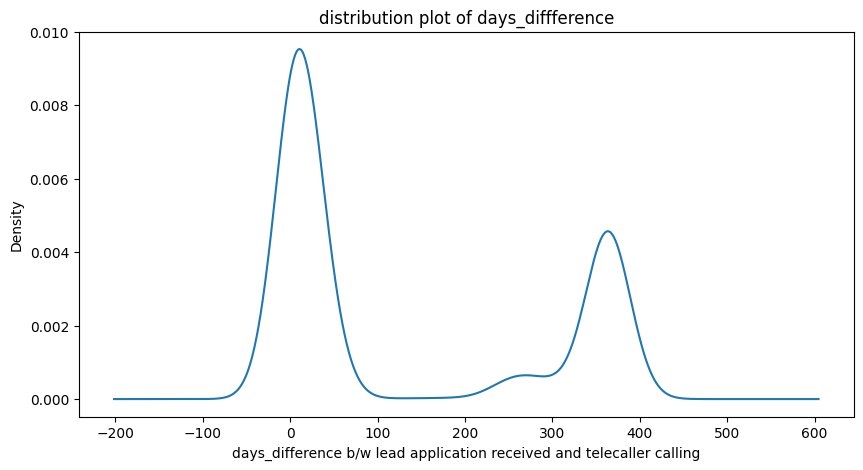

In [112]:
plt.figure(figsize=(10, 5))
model_dataset['days_difference'].plot(kind='kde')
plt.title('distribution plot of days_diffference')
plt.xlabel('days_difference b/w lead application received and telecaller calling')
plt.show()

 Most of the data points are concentrated around 0 and 360

Acutally, we can get rid of the data points where the days_difference is greater than 30 days.
since calling too late is what we don't want to do. And also that would unnecessarily increase the complexity of the model.

In [113]:
# filtering the rows with days_difference lesser than 30 days.
model_dataset = model_dataset[model_dataset['days_difference']<30]

In [114]:
model_dataset.shape # shape of the modified dataset.

(6874, 7)

In [115]:
model_dataset.head(3) # modified dataset

name_telecaller  client        status  source  isExternal       city  \
1          Sheeba  Others      negative  Others           0  Hyderabad   
2          Sheeba  Others  inaccessible  Others           0  Hyderabad   
3          Sheeba  Others  inaccessible  Others           0  Hyderabad   

   days_difference  
1                9  
2                6  
3                0

In [116]:
# to check the skewness in this numerical feature.
from scipy.stats import skew
skew(model_dataset['days_difference'])

0.7955002692759255

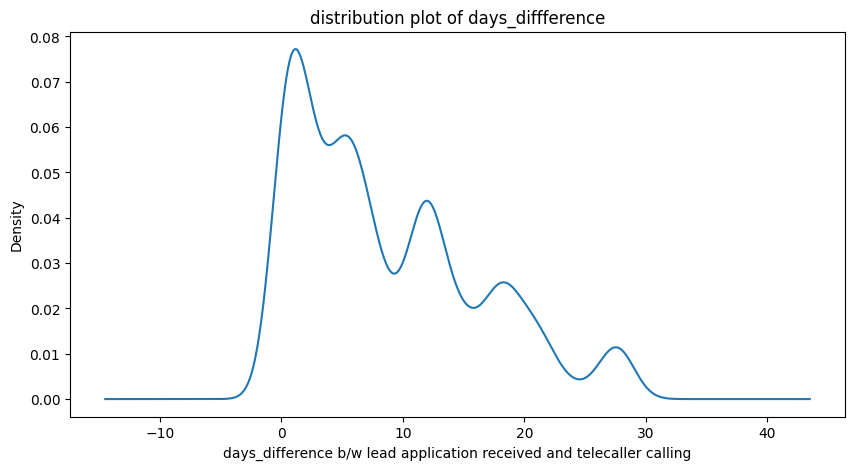

In [117]:
plt.figure(figsize=(10, 5))
model_dataset['days_difference'].plot(kind='kde')
plt.title('distribution plot of days_diffference')
plt.xlabel('days_difference b/w lead application received and telecaller calling')
plt.show()

Clearly the data is skewed towards right side.
It needs to be transformed.

In [118]:
# handling this right skeweed dataset applying logarithmic tranformation:
model_dataset['days_difference'] = np.sqrt(model_dataset['days_difference'])

In [119]:
skew(model_dataset['days_difference']) # now the skewness is closer towards 0.

-0.10543616965305888

Now the skewness is closer towards 0. 
When we tried logarithmic transfromation, the value was coming to -0.45,` so I decided to go with square root transformation

In [120]:
# Importing necessary libaries for training process:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [121]:
# Splitting the dataset into training and testing sets before preprocessing
X = model_dataset.drop('status', axis=1)  # Independent Features
y = model_dataset['status']  # Target variable

In [122]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [123]:
# Label Encoding the 'status' feature
label_encoder_status = LabelEncoder()
y_train_encoded = label_encoder_status.fit_transform(y_train)
y_test_encoded = label_encoder_status.transform(y_test)


In [124]:
# Identifying categorical columns for One-Hot Encoding (excluding 'status')
categorical_columns = X_train.select_dtypes(include='object').columns.tolist()

In [125]:
# Applying One-Hot Encoding to the categorical features in the training and testing sets
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
X_train_one_hot = one_hot_encoder.fit_transform(X_train[categorical_columns])
X_test_one_hot = one_hot_encoder.transform(X_test[categorical_columns])

In [126]:
# Converting the encoded features back to dataframes
X_train_one_hot_df = pd.DataFrame(X_train_one_hot, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
X_test_one_hot_df = pd.DataFrame(X_test_one_hot, columns=one_hot_encoder.get_feature_names_out(categorical_columns))


In [127]:

# Dropping the original categorical columns and adding the encoded ones
X_train_processed = X_train.drop(categorical_columns, axis=1).reset_index(drop=True)
X_train_processed = pd.concat([X_train_processed, X_train_one_hot_df], axis=1)

X_test_processed = X_test.drop(categorical_columns, axis=1).reset_index(drop=True)
X_test_processed = pd.concat([X_test_processed, X_test_one_hot_df], axis=1)


In [128]:
# Showing the first few rows of the processed training dataset
X_train_processed.head()

isExternal  days_difference  name_telecaller_Rakshith  \
0           0         1.000000                       0.0   
1           0         0.000000                       1.0   
2           0         4.358899                       0.0   
3           1         0.000000                       0.0   
4           0         0.000000                       0.0   

   name_telecaller_Sheeba  client_Others  client_Swiggy  client_Uber Eats  \
0                     1.0            0.0            1.0               0.0   
1                     0.0            0.0            0.0               0.0   
2                     1.0            0.0            1.0               0.0   
3                     1.0            0.0            0.0               1.0   
4                     1.0            1.0            0.0               0.0   

   client_Zomato  source_Airavatha data  source_Facebook  source_Others  \
0            0.0                    0.0              0.0            1.0   
1            1.0                    0.0              0.0            1.0   
2            0.0                    0.0              0.0            0.0   
3            0.0                    0.0              0.0            1.0   
4            0.0                    0.0              0.0            0.0   

   source_Referrals  source_WhatsApp OptIn Form  source_unknown  city_Chennai  \
0               0.0                         0.0             0.0           0.0   
1               0.0                         0.0             0.0           0.0   
2               0.0                         0.0             0.0           0.0   
3               0.0                         0.0             0.0           0.0   
4               0.0                         0.0             0.0           0.0   

   city_Delhi/NCR  city_Hyderabad  city_Missing  city_Mumbai  city_Others  
0             0.0             1.0           0.0          0.0          0.0  
1             0.0             0.0           0.0          0.0          1.0  
2             0.0             1.0           0.0          0.0          0.0  
3             0.0             0.0           0.0          0.0          0.0  
4             0.0             0.0           0.0          0.0          1.0

In [129]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Scaling the features in the training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

In [130]:
# Handling class imbalance in the training set using SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train_encoded)
# Checking the class distribution after applying SMOTE
pd.Series(y_train_smote).value_counts()

0    2390
1    2390
3    2390
4    2390
2    2390
Name: count, dtype: int64

In [131]:
# We can see that smote has handled the imbalance in the target variable.

In [132]:
# applying the dimensionality reduction techniques:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test_scaled)


In [133]:
from sklearn.ensemble import RandomForestClassifier
# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [136]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "   Support Vector Machine (RBF Kernel)": SVC(),        
    "                         Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_pca, y_train_smote)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
   Support Vector Machine (RBF Kernel) trained.
                         Random Forest trained.


In [137]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test_pca, y_test_encoded) * 100))

                   Logistic Regression: 33.62%
                   K-Nearest Neighbors: 44.39%
                         Decision Tree: 41.83%
   Support Vector Machine (RBF Kernel): 37.41%
                         Random Forest: 41.13%


#### The perfromance of these classification models are not good.

1. Even after doing indepth pre-processing of dataset, the performance of the model is too less to do predictive analysis.
2. There might be some latent features that we further need to look into from business perspective.
3. May be some other external factors are affecting the performance.
4. Also may be the some discrepancies would have occured while collecting the dataset that could not be captured.


In [1]:
# for exporting this notebook in PDF format
import plotly.io as pio
pio.renderers.default='notebook'

!pip install Pyppeteer
!pyppeteer-install


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
chromium is already installed.
